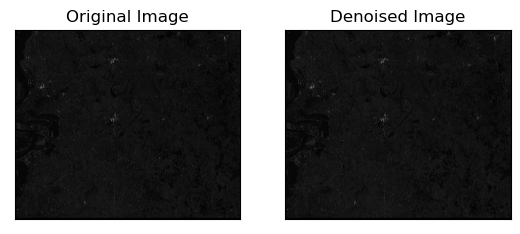

In [1]:
#Noise Reduction
import cv2
import numpy as np
from matplotlib import pyplot as plt
image = cv2.imread("C:\\Users\\B-Tech\\Downloads\\ALPSRP247640500-H2.2_UA\\HH-ALPSRP247640500-H2.2_UA.tif", 0)
blurred_image = cv2.GaussianBlur(image, (5, 5), 0) 
plt.subplot(121), plt.imshow(image, cmap='gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])

plt.subplot(122), plt.imshow(blurred_image, cmap='gray')
plt.title('Denoised Image'), plt.xticks([]), plt.yticks([])

plt.show()


In [2]:
cv2.imwrite('denoised_image.tif', blurred_image)

True

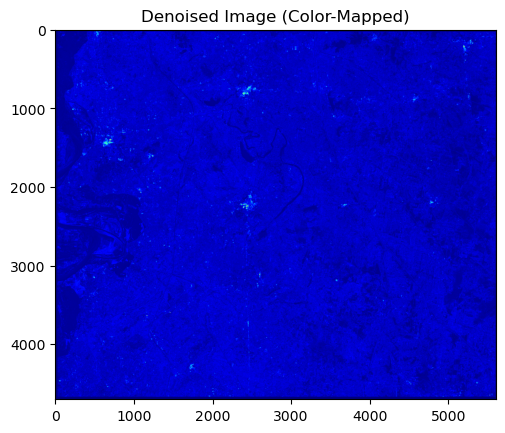

In [3]:
#Color Mapping
import cv2
import numpy as np
import matplotlib.pyplot as plt

image = cv2.imread ("C:\\Users\\B-Tech\\Downloads\\ALPSRP247640500-H2.2_UA\\HH-ALPSRP247640500-H2.2_UA.tif", 0)

blurred_image = cv2.GaussianBlur(image, (5, 5), 0)

colormap_image = cv2.applyColorMap(blurred_image, cv2.COLORMAP_JET)

plt.imshow(cv2.cvtColor(colormap_image, cv2.COLOR_BGR2RGB))
plt.title('Denoised Image (Color-Mapped)')
plt.show()

In [4]:
#Mean Squared Error
import numpy as np

def mse(image1, image2):
    return np.mean((image1 - image2) ** 2)

original_image = cv2.imread ("C:\\Users\\B-Tech\\Downloads\\ALPSRP247640500-H2.2_UA\\HH-ALPSRP247640500-H2.2_UA.tif", 0)
denoised_image = cv2.GaussianBlur(original_image, (5, 5), 0)

mse_value = mse(original_image, denoised_image)
print(f"Mean Squared Error: {mse_value}")

Mean Squared Error: 7.627716603343465


In [5]:
#Structural Similarity Index (SSIM)
from skimage.metrics import structural_similarity as ssim

original_image = cv2.imread ("C:\\Users\\B-Tech\\Downloads\\ALPSRP247640500-H2.2_UA\\HH-ALPSRP247640500-H2.2_UA.tif", 0)
denoised_image = cv2.GaussianBlur(original_image, (5, 5), 0)

ssim_value = ssim(original_image, denoised_image)
print(f"Structural Similarity Index (SSIM): {ssim_value}")

Structural Similarity Index (SSIM): 0.9179259698430858


In [6]:
#Reading Specific Pixel Value
import cv2
import numpy as np

original_image = cv2.imread("C:\\Users\\B-Tech\\Downloads\\ALPSRP247640500-H2.2_UA\\HH-ALPSRP247640500-H2.2_UA.tif", 0) 

denoised_image = cv2.GaussianBlur(original_image, (7, 7), 3)

original_pixels = np.array(original_image)
denoised_pixels = np.array(denoised_image)

row, col = 150, 150
original_pixel_value = original_pixels[row, col]
denoised_pixel_value = denoised_pixels[row, col]

print(f'Original pixel value at ({row}, {col}): {original_pixel_value}')
print(f'Denoised pixel value at ({row}, {col}): {denoised_pixel_value}')

Original pixel value at (150, 150): 8
Denoised pixel value at (150, 150): 7


Original Image Amplitude (Magnitude):
[[1308.         2938.93867775 2091.33915317 ... 5595.97688046
  2091.33915317 2938.93867775]
 [3163.65036228 1972.36696655  726.29352595 ... 1868.12133889
  5852.84042996 4375.1290761 ]
 [4693.01201685 1443.37750831  486.65171616 ... 4270.17762944
  5047.83241848 4102.32590807]
 ...
 [2975.10317246 3073.02808347 1661.74574832 ... 6131.86076355
  3942.18954394 3008.80198559]
 [4693.01201685 4102.32590807 5047.83241848 ... 3027.10419813
   486.65171616 1443.37750831]
 [3163.65036228 4375.1290761  5852.84042996 ... 2152.9278066
   726.29352595 1972.36696655]]
Denoised Image Amplitude (Magnitude):
[[1371.         1055.09220261 2378.64037674 ...  732.470152
  2378.64037674 1055.09220261]
 [1852.63411938 1361.6288339   245.59457279 ... 1230.47563639
  1139.26746137  540.34202638]
 [1350.25249864  791.59838238 1067.67799236 ... 1634.94149338
  1056.96845261 1448.15442991]
 ...
 [1027.97000491  696.62096485 1189.15703572 ... 1533.55393528
   809.8432183  2

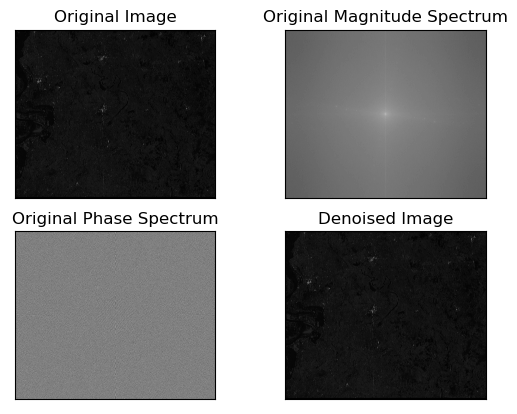

In [7]:
#Fourier Transform
import cv2
import numpy as np
import matplotlib.pyplot as plt

original_image = cv2.imread("C:\\Users\\B-Tech\\Downloads\\ALPSRP247640500-H2.2_UA\\HH-ALPSRP247640500-H2.2_UA.tif", 0)

denoised_image = cv2.imread('denoised_image.tif', 0)

if original_image is not None and denoised_image is not None:
    original_transform = np.fft.fft2(original_image)
    original_transform = np.fft.fftshift(original_transform)
    original_magnitude = np.abs(original_transform)
    original_phase = np.angle(original_transform)

    denoised_transform = np.fft.fft2(denoised_image)
    denoised_transform = np.fft.fftshift(denoised_transform)
    denoised_magnitude = np.abs(denoised_transform)
    denoised_phase = np.angle(denoised_transform)

    print("Original Image Amplitude (Magnitude):")
    print(original_magnitude)

    print("Denoised Image Amplitude (Magnitude):")
    print(denoised_magnitude)

    print("Original Image Phase:")
    print(original_phase)

    print("Denoised Image Phase:")
    print(denoised_phase)

    plt.subplot(221), plt.imshow(original_image, cmap='gray')
    plt.title('Original Image'), plt.xticks([]), plt.yticks([])

    plt.subplot(222), plt.imshow(np.log(original_magnitude), cmap='gray')
    plt.title('Original Magnitude Spectrum'), plt.xticks([]), plt.yticks([])

    plt.subplot(223), plt.imshow(original_phase, cmap='gray')
    plt.title('Original Phase Spectrum'), plt.xticks([]), plt.yticks([])

    plt.subplot(224), plt.imshow(denoised_image, cmap='gray')
    plt.title('Denoised Image'), plt.xticks([]), plt.yticks([])

    plt.show()

else:
    print("Error: Unable to load image(s). Please check the file paths.")